Script to plot the reflection, transmission and absorption of a twisted polaritonic crystal (PC) on an in-plane anisotropic material (MoO3 as example). The derivations are based on thin layer approximation.

# Open the packages for the script

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec

In [17]:
# Define some useful functions for the code
cos = np.cos
sin = np.sin
pi = np.pi
exp = np.exp
sqrt = np.sqrt
bessel = spec.jv

## Define the function of the permittivity of MoO3
Parameters from paper: https://onlinelibrary.wiley.com/doi/abs/10.1002/adma.201908176

In [3]:
def eps_harm_Osc(w, wT, wL, gamma):
    eps_h = (w*w-wL**2+1j*gamma*w)/(w*w-wT**2+1j*gamma*w)
    return eps_h

In [4]:
def eps_MoO3(w, axis):
    if(axis=='[100]'): # x-axis of MoO3
        epsinf = 6.09
        gamma = np.array([[73, 11.9, 2.1]])
        wTO = np.array([[507, 822.7, 998.8]])
        wLO = np.array([[534, 978.8, 999.5]])

    if(axis=='[001]'): # z-axis of MoO3
        epsinf = 6.38
        gamma = np.array([[17.9]])
        wTO = np.array([[544.9]])
        wLO = np.array([[855.8]])

    if(axis=='[010]'): # y-axis of MoO3
        epsinf = 4.4
        gamma = np.array([[0.7]])
        wTO = np.array([[963]])
        wLO = np.array([[1006.6]])

    eps = np.ones(np.shape(w)[0],)
    for i in range(np.shape(wTO)[1]):
        eps = eps*eps_harm_Osc(w,wTO[0,i],wLO[0,i],gamma[0,i])

    eps = epsinf*eps

    return eps

# Define D matrix
Formula from the article: https://onlinelibrary.wiley.com/doi/abs/10.1002/lpor.202200428

In [5]:
def HA_Dmatrix(kt,k0,g1t,g2t,n1,n2,e1,e2,axxr,axyr,ayyr):
    # Function to calculate the D matrix of the PC

    #Initialize
    Ln1 = len(n1)
    Ln2 = len(n2)
    [c1,c2] = np.shape(axxr)
    D = np.zeros((2*Ln1*Ln2,2*Ln1*Ln2))+0*1j

    for i in range(Ln1):
        for j in range(Ln2):

            # In-plane wavenumber row
            ktN2 = kt+n1[i]*g1t+n2[j]*g2t
            
            for b2 in range(2):
                for k in range(Ln1):
                    for l in range(Ln2):

                        # In plane wavenumber column
                        ktN1 = kt+n1[k]*g1t+n2[l]*g2t
                        
                        # Out-of-plane momentum
                        qz1N = sqrt(e1*k0**2-np.vdot(ktN1,ktN1))/k0
                        qz2N = sqrt(e2*k0**2-np.vdot(ktN1,ktN1))/k0

                        # Ensure that imag(qz)>0
                        if (np.imag(qz1N)<0):
                            qz1N = -qz1N
                        
                        if (np.imag(qz2N)<0):
                            qz2N = -qz2N
                        
                        #Matrix elements

                        for b1 in range(2):
                            P = 0+0*1j
                            M = 0+0*1j
                            
                            if np.abs(n1[i]-n1[k])<=c1-1 and np.abs(n2[j]-n2[l])<=c2-1:
                                
                                # M^{b2,b1}_{N''N}
                                if b1==0 and b2==0:
                                    M = axxr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,1]*ktN2[0,1]-axyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*(ktN1[0,1]*ktN2[0,0]+ktN1[0,0]*ktN2[0,1])+ayyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,0]*ktN2[0,0]
                                elif b1==1 and b2==0:
                                    M = -axxr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,0]*ktN2[0,1]+axyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*(ktN1[0,0]*ktN2[0,0]-ktN1[0,1]*ktN2[0,1])+ayyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,1]*ktN2[0,0]
                                elif b1==0 and b2==1:
                                    M = -axxr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,1]*ktN2[0,0]+axyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*(ktN1[0,0]*ktN2[0,0]-ktN1[0,1]*ktN2[0,1])+ayyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,0]*ktN2[0,1]
                                elif b1==1 and b2==1:
                                    M = axxr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,0]*ktN2[0,0]+axyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*(ktN1[0,1]*ktN2[0,0]+ktN1[0,0]*ktN2[0,1])+ayyr[int(np.abs(n1[i]-n1[k])),int(np.abs(n2[j]-n2[l]))]*ktN1[0,1]*ktN2[0,1]

                                
                                # Diagonal elements have an extra term
                                if n2[j]==n2[l] and n1[i]==n1[k] and b1==b2:
                                    if(b1==0):
                                        P = qz1N+qz2N
                                    elif(b1==1):
                                        P = e1/qz1N+e2/qz2N
                                
                                # To avoid some 1/0

                                if(M==0):
                                    D[2*Ln2*i+2*j+b2,2*Ln2*k+2*l+b1] = P
                                else:
                                    D[2*Ln2*i+2*j+b2,2*Ln2*k+2*l+b1] = 2*M/(np.linalg.norm(ktN1)*np.linalg.norm(ktN2))+P
                                    

    return D


# Calculate the reciprocal lattice

In [6]:
# Inputs:
L = 0.9 # Modulus of the vector basis for hole array in um
mn1 = 30 # nº of harmonics to plot in the L1 direction
mn2 = 0 # nº of harmonics to plot in the L2 direction
d = 0.4/2 # Radius of the holes in um

# Calculate the lattice vectors (square lattice, for another lattice change the vectors)
L1 = np.array([[L,0]])
L2 = np.array([[0,L]])
Ln1 = 2*mn1+1 # Number of harmonics in L1 direction
Ln2 = 2*mn2+1 # Number of harmonics in L2 direction
n1 = np.linspace(-mn1,mn1,int(Ln1)) # Harmonics in L1 direction
n2 = np.linspace(-mn2,mn2,int(Ln2)) # Harmonics in L2 direction

# Reciprocal vector basis
g1 = np.array([[2*pi/L1[0,0],-2*pi*L2[0,0]/(L2[0,1]*L1[0,0])]])
g2 = np.array([[0,2*pi/L2[0,1]]])

# Fourier expansion coefficients without conductivity
fen = 2 # fen=mn1+1 to take all possible harmonics
fem = 1 # fem=mn2+1 to take all possible harmonics
FE = np.zeros((fen,fem))

for i in range(fen):
    for j in range(fem):
        if((i==0)&(j==0)):
            FE[i,j]=(1-pi*d**2/L**2)
        else:
            FE[i,j]=-d/(L*sqrt(i**2+j**2))*bessel(1,2*pi*d/L*sqrt(i**2+j**2))

# Calculate the reflection and transmission
Formula from the article: https://onlinelibrary.wiley.com/doi/abs/10.1002/lpor.202200428

In [18]:
# Inputs:
w = np.array([[920]]) # Frequency in cm^-1
e2 = 1 # Permittivity of the substrate
e1 = 1 # Permittivity of the superstrate
t = 0.1 # Thickness of the layer, in um
theta = 0 # Twist angle
I = np.array([[0,1]]) # Incident field as a vector, I=[Is,Ip]
kt = np.array([[1,0]])*10e-14+0*1j # Momentum of the incident wave. Normal incidence linearly polarized along x direction
nx = 1000 # nº of points in x
ny = 1000 # nº of points in y
x = np.linspace(0,4*L,nx) # Partition in x
y = np.linspace(0,4*L,ny) # Partition in y

# Script:

# Grid of to be plotted
[xx,yy] = np.meshgrid(x,y)

# Permittivity of the material
epsx = eps_MoO3(w, '[100]')
epsy = eps_MoO3(w, '[001]')

# Twisted reciprocal vector basis
g1t = np.array([[g1[0,0]*cos(theta)-g1[0,1]*sin(theta),g1[0,0]*sin(theta)+g1[0,1]*cos(theta)]])
g2t = np.array([[g2[0,0]*cos(theta)-g2[0,1]*sin(theta),g2[0,0]*sin(theta)+g2[0,1]*cos(theta)]])

# Momentum and wavelength
lam = 10**4/w
k0 = 2*pi/lam
        
# Effective conductivity
ax = pi*t/(1j*lam)*epsx
ay = pi*t/(1j*lam)*epsy
        
# Fourier expansion conductivity
ayyr = ay*FE
axyr = 0*FE
axxr = ax*FE
        
# Initialization of the system of equations
V = np.zeros((2*Ln1*Ln2,1))+0*1j

# Calculate out of plane momentum
q1z = sqrt(e1*k0**2-np.vdot(kt,kt))/k0
        
# Ensure q1z has positive imaginary part (losses)
if (np.imag(q1z)<0):
    q1z = -q1z
        
# Matrix of the system of equations
D = HA_Dmatrix(kt,k0,g1t,g2t,n1,n2,e1,e2,axxr,axyr,ayyr)
        
# Vector with the dependent variables of the system of equations
V[Ln1*Ln2-1]=2*I[0,0]*q1z # s polariz for (0,0) harmonic
V[Ln1*Ln2]=2*I[0,1]*e1/q1z # p polariz for (0,0) harmonic
        
# Solve Tn
Tn = np.linalg. solve(D,V)
        
# Solve Rn
Rn = Tn
Rn[Ln1*Ln2-1] = Rn[Ln1*Ln2-1]-I[0,0] # s polariz for (0,0) harmonic
Rn[Ln1*Ln2] = Rn[Ln1*Ln2]-I[0,1] # p polariz for (0,0) harmonic

# Electric field along L1 direction
Ep = np.zeros((nx,ny))+0j
Es = np.zeros((nx,ny))+0j

for i in range(Ln1):
    for j in range(Ln2):
        Ep = Ep+Rn[2*Ln2*i+2*j+1]*exp(1j*(xx*(n1[i]*g1t[0,0]+n2[j]*g2[0,0])+yy*(n1[i]*g1t[0,1]+n2[j]*g2t[0,1])))
        Es = Es+Rn[2*Ln2*i+2*j]*exp(1j*(xx*(n1[i]*g1t[0,0]+n2[j]*g2[0,0])+yy*(n1[i]*g1t[0,1]+n2[j]*g2t[0,1])))

C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_20704\1736001465.py:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[2*Ln2*i+2*j+b2,2*Ln2*k+2*l+b1] = 2*M/(np.linalg.norm(ktN1)*np.linalg.norm(ktN2))+P


# Plot the results

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_20704\4059344442.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("x ($\mu$ m)")
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_20704\4059344442.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("x ($\mu$ m)")


Text(0, 0.5, 'E_s')

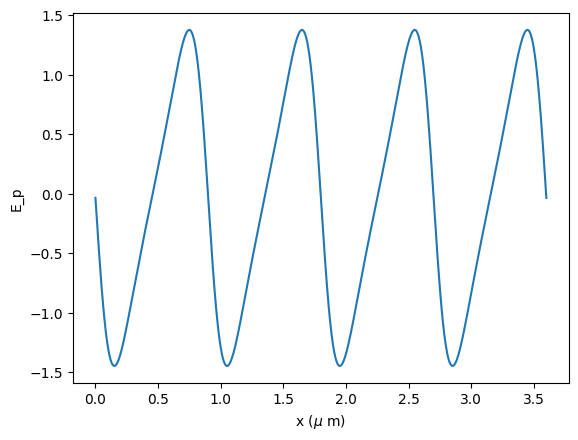

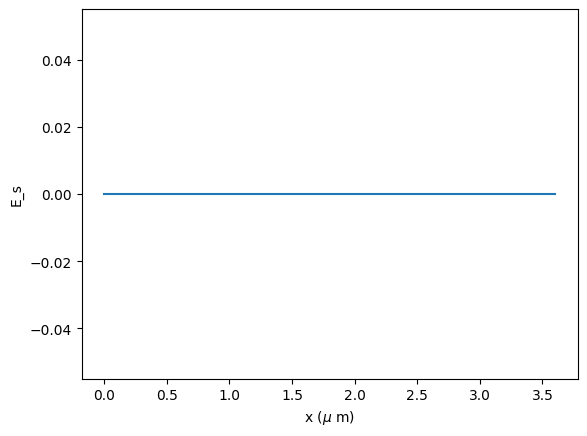

In [21]:
plt.figure(0)
plt.plot(xx[0,:],np.real(Ep[0,:]))
plt.xlabel("x ($\mu$ m)")
plt.ylabel("E_p")

plt.figure(1)
plt.plot(xx[0,:],np.real(Es[0,:]))
plt.xlabel("x ($\mu$ m)")
plt.ylabel("E_s")
